In [1]:
import numpy as np
import scipy.stats as ss
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
np.corrcoef(x, y)

array([[1.        , 0.75864029],
       [0.75864029, 1.        ]])

 **_corrcoef()_** returns the correlation matrix, which is a two-dimensional array with the correlation coefficients.

The values on the *main diagonal* of the correlation matrix (upper left and lower right) are equal to 1. The upper left value corresponds to the correlation coefficient for x and x, while the lower right value is the correlation coefficient for y and y. **They are always equal to 1**.

In [3]:
ss.pearsonr(x, y)

(0.7586402890911869, 0.010964341301680832)

In [4]:
ss.spearmanr(x,y)

SpearmanrResult(correlation=0.9757575757575757, pvalue=1.4675461874042197e-06)

In [5]:
ss.kendalltau(x, y)

KendalltauResult(correlation=0.911111111111111, pvalue=2.9761904761904762e-05)

Note that these functions return objects that contain two values:

1. The correlation coefficient
2. The p-value

You can use *tuple-unpacking* to access both values

In [6]:
x , y = pd.Series(x), pd.Series(y)
x.corr(y)

0.7586402890911867

In [7]:
x.corr(y, method="kendall")

0.911111111111111

*Linear regression* is the process of finding the linear function that is as close as possible to the actual relationship between features. In other words, you determine the linear function that best describes the association between the features. This linear function is also called the *regression line*.

In [8]:
ss.linregress(x, y)

LinregressResult(slope=7.4363636363636365, intercept=-85.92727272727274, rvalue=0.7586402890911869, pvalue=0.010964341301680825, stderr=2.257878767543913)

In [9]:
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
                [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])
np.corrcoef(xyz)

array([[ 1.        ,  0.75864029, -0.96807242],
       [ 0.75864029,  1.        , -0.83407922],
       [-0.96807242, -0.83407922,  1.        ]])

In [10]:
z = pd.Series([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])
xy = pd.DataFrame({"x-values": x, "y-values": y})
xy

,x-values,y-values
0,10,2
1,11,1
2,12,4
3,13,5
4,14,8
5,15,12
6,16,18
7,17,25
8,18,96
9,19,48


In [11]:
xyz = pd.DataFrame({"x-values": x, "y-values": y, "z-values": z})
xyz

,x-values,y-values,z-values
0,10,2,5
1,11,1,3
2,12,4,2
3,13,5,1
4,14,8,0
5,15,12,-2
6,16,18,-8
7,17,25,-11
8,18,96,-15
9,19,48,-16


In [12]:
xy.corr()

,x-values,y-values
x-values,1.00000,0.75864
y-values,0.75864,1.00000


In [13]:
xyz.corr()

,x-values,y-values,z-values
x-values,1.000000,0.758640,-0.968072
y-values,0.758640,1.000000,-0.834079
z-values,-0.968072,-0.834079,1.000000


In [14]:
xy.corrwith(z)

x-values   -0.968072
y-values   -0.834079
dtype: float64

In [15]:
z = np.array(z)
ss.rankdata(x)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [16]:
ss.rankdata(y)

array([ 2.,  1.,  3.,  4.,  5.,  6.,  7.,  8., 10.,  9.])

In [17]:
ss.rankdata(z)

array([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

In [18]:
ss.rankdata([8, np.nan, 0, 2])

array([3., 4., 1., 2.])

You can also get ranks with **_np.argsort()_**:

In [19]:
np.argsort(y) + 1

0     2
1     1
2     3
3     4
4     5
5     6
6     7
7     8
8    10
9     9
dtype: int64

**_argsort()_** returns the indices that the array items would have in the sorted array. These indices are zero-based, so you’ll need to add 1 to all of them.

In [20]:
ss.spearmanr(x, y)

SpearmanrResult(correlation=0.9757575757575757, pvalue=1.4675461874042197e-06)

In [21]:
ss.kendalltau(x, y)

KendalltauResult(correlation=0.911111111111111, pvalue=2.9761904761904762e-05)

In [22]:
x, y, z = pd.Series(x), pd.Series(y), pd.Series(z)

In [23]:
x.corr(y, method="spearman")

0.9757575757575757

In [24]:
xy.corr(method="spearman")

,x-values,y-values
x-values,1.000000,0.975758
y-values,0.975758,1.000000


In [25]:
xy.corrwith(z, method="spearman")

x-values   -1.000000
y-values   -0.975758
dtype: float64

In [26]:
x.corr(y, method="kendall")

0.911111111111111

In [27]:
xy.corr(method="kendall")

,x-values,y-values
x-values,1.000000,0.911111
y-values,0.911111,1.000000


In [28]:
xyz.corr(method="kendall")

,x-values,y-values,z-values
x-values,1.000000,0.911111,-1.000000
y-values,0.911111,1.000000,-0.911111
z-values,-1.000000,-0.911111,1.000000


In [29]:
xy.corrwith(z, method="kendall")

x-values   -1.000000
y-values   -0.911111
dtype: float64

In [30]:
x, y, z = np.array(x), np.array(y), np.array(z)
xyz = np.array(xyz)

In [31]:
slope, intercept, r, p, stderr = ss.linregress(x, y)

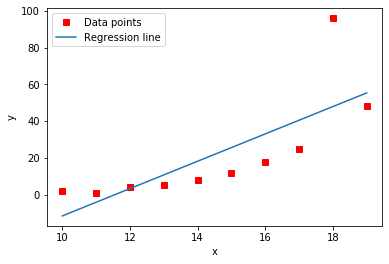

In [32]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker="s", label="Data points", color="red")
ax.plot(x, intercept + slope * x, label="Regression line")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(facecolor="white")
plt.show()